# Regresiones con Scikit-Learn

> "**Scikit-learn** es una biblioteca para aprendizaje automático de software libre para el lenguaje de programación Python. Incluye varios algoritmos de clasificación, regresión y análisis de grupos entre los cuales están máquinas de vectores de soporte, bosques aleatorios, Gradient boosting, K-means y DBSCAN. Está diseñada para interoperar con las bibliotecas numéricas y científicas NumPy y SciPy.

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split

In [2]:
path_csv = 'C:\\Users\\Alejandro Zavala\\Zavala_Programas\\Repositorios_Git\\Programacion\\Python\\Insumos\\ht_agg.csv'
pd_ht = pd.read_csv(path_csv, sep=',')

In [3]:
pd_ht.head()

,device_id,mean_bmi,mean_active_heartrate,mean_resting_heartrate,mean_vo2,mean_steps,lifestyle
0,e9ca5040-e48a-11ea-8204-0242ac110002,12.654054,108.286159,54.028433,33.039727,15997.964384,Cardio Enthusiast
1,da17592c-e48a-11ea-8204-0242ac110002,20.913669,108.150718,54.779083,36.500396,12811.049315,Cardio Enthusiast
2,f88d1252-e48a-11ea-8204-0242ac110002,21.775090,123.756602,82.717093,18.609143,10444.443836,Athlete
3,edc57fb2-e48a-11ea-8204-0242ac110002,10.975399,110.260624,54.656832,29.183789,16649.802740,Cardio Enthusiast
4,f8fd7682-e48a-11ea-8204-0242ac110002,22.338725,131.062285,81.114548,24.338431,5219.717808,Sedentary


[Text(0.5, 1.0, 'Average daily steps')]

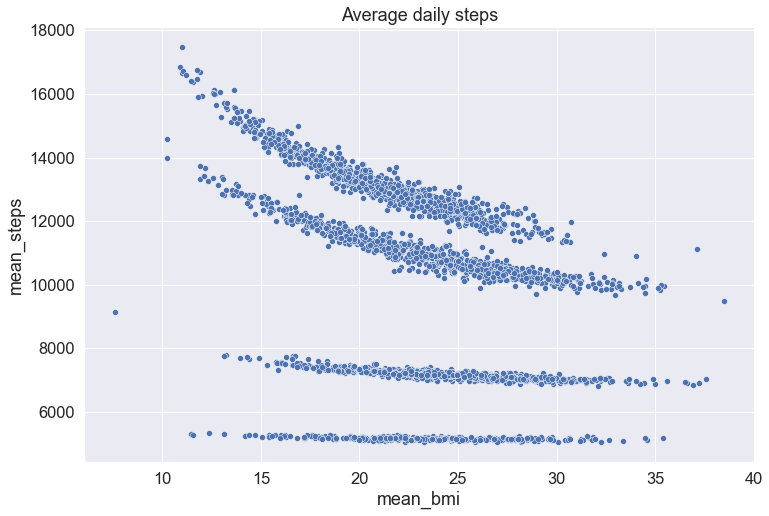

In [4]:
fig = plt.gcf()

# Change seaborn plot size
fig.set_size_inches(12, 8)
sns.set(font_scale=1.5)
sns.scatterplot(x = 'mean_bmi', y = 'mean_steps', data=pd_ht).set(title='Average daily steps')

In [5]:
lr_model = LinearRegression()

In [6]:
pd_bmi = pd_ht[['mean_bmi']]
pd_steps = pd_ht['mean_steps']

In [7]:
pd_bmi

,mean_bmi
0,12.654054
1,20.913669
2,21.775090
3,10.975399
4,22.338725
...,...
2995,26.982282
2996,21.079541
2997,23.239117
2998,24.399904


In [8]:
pd_steps

0       15997.964384
1       12811.049315
2       10444.443836
3       16649.802740
4        5219.717808
            ...     
2995    10369.923288
2996    13006.093151
2997    12651.339726
2998    11208.454795
2999     7116.761644
Name: mean_steps, Length: 3000, dtype: float64

In [9]:
lr_model.fit(pd_bmi, pd_steps)

LinearRegression()

In [10]:
lr_model.score(pd_bmi, pd_steps) # Another way to calculate r^2

0.20602251848647912

# Running multiple models of regression

R^2 of model mean_steps ~ mean_bmi is: 0.20602251848647912
R^2 of model mean_steps ~ mean_active_heartrate is: 0.6678701074913513
R^2 of model mean_steps ~ mean_resting_heartrate is: 0.6238073213314257
R^2 of model mean_steps ~ mean_vo2 is: 0.5349213499717118


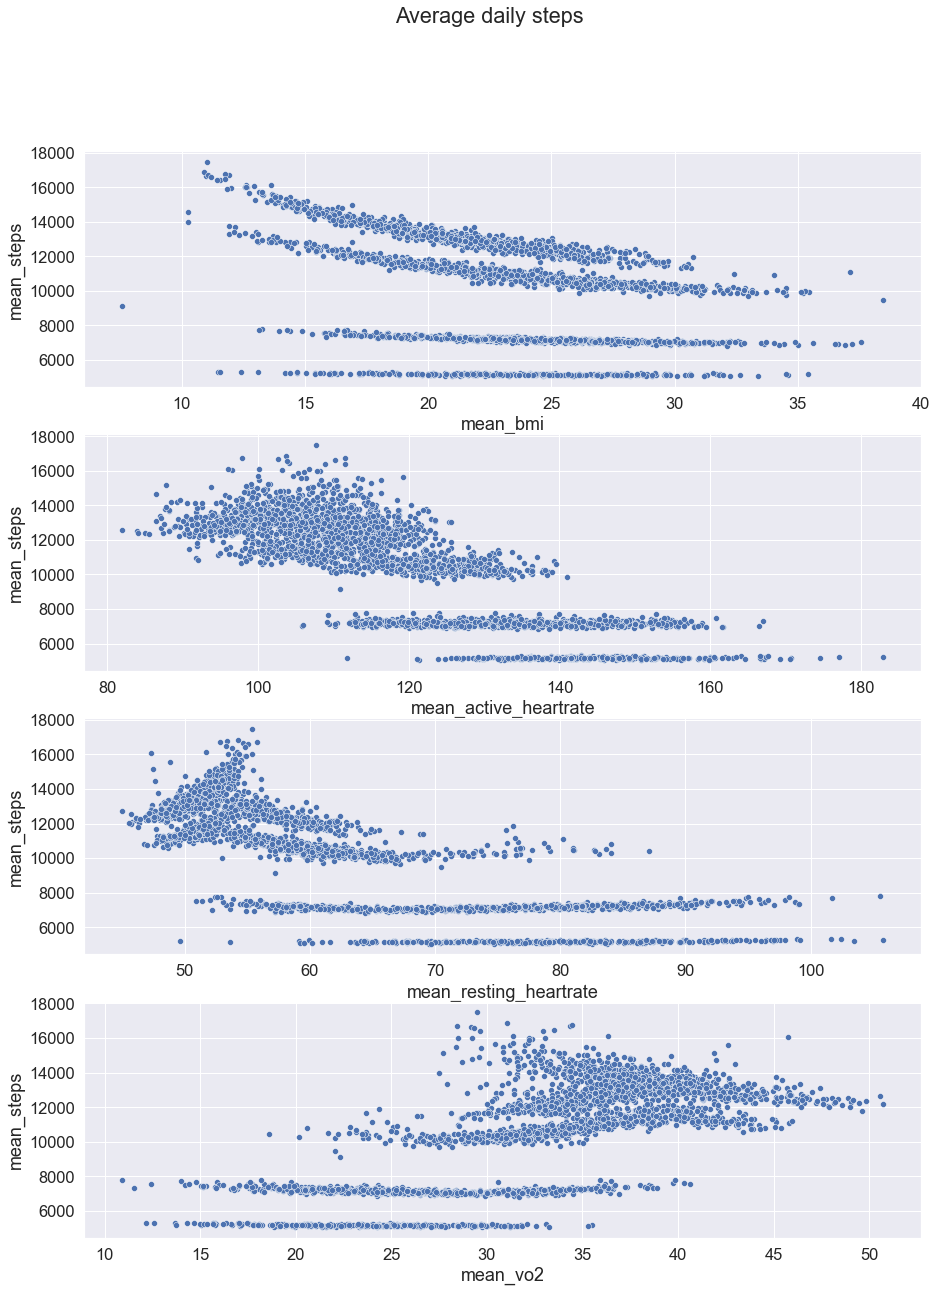

In [11]:
x_multiple = ['mean_bmi','mean_active_heartrate','mean_resting_heartrate','mean_vo2']
total_plots = len(x_multiple)
y_default = 'mean_steps'

i_plot = 0
fig, axs = plt.subplots(nrows=total_plots,figsize=(15,20))
fig.suptitle('Average daily steps') # or plt.suptitle('Main title')

for x_i in x_multiple:
    
    sns.scatterplot(x = x_i, y = y_default, data = pd_ht, ax = axs[i_plot])
    lr_model = LinearRegression().fit(pd_ht[[x_i]], pd_ht[y_default])
    print('R^2 of model {0} ~ {1} is: {2}'.format(y_default,x_i,lr_model.score(pd_ht[[x_i]], pd_ht[y_default])))
    i_plot = i_plot + 1

## Multiple Regression

In [12]:
meanbmi_meanacthr = ['mean_bmi','mean_active_heartrate']
x_pd = pd_ht[meanbmi_meanacthr]

lr_model = LinearRegression().fit(x_pd, pd_ht[y_default])
print('R^2 of model {0} ~ {1} is: {2}'.format(y_default,' + '.join(meanbmi_meanacthr),lr_model.score(x_pd, pd_ht[y_default])))

R^2 of model mean_steps ~ mean_bmi + mean_active_heartrate is: 0.7062981576686536


In [13]:
x_models = [['mean_active_heartrate', 'mean_resting_heartrate'],
            ['mean_active_heartrate', 'mean_vo2'],
            ['mean_active_heartrate', 'mean_bmi', 'mean_vo2'],
            ['mean_active_heartrate', 'mean_bmi', 'mean_vo2', 'mean_resting_heartrate']]

for x_model in x_models:
    lr_model = LinearRegression().fit(pd_ht[x_model], pd_ht[y_default])
    print('R^2 of model {0} ~ {1} is: {2:0.5f}'.format(y_default,' + '.join(x_model),lr_model.score(pd_ht[x_model], pd_ht[y_default])))

R^2 of model mean_steps ~ mean_active_heartrate + mean_resting_heartrate is: 0.71684
R^2 of model mean_steps ~ mean_active_heartrate + mean_vo2 is: 0.68763
R^2 of model mean_steps ~ mean_active_heartrate + mean_bmi + mean_vo2 is: 0.74241
R^2 of model mean_steps ~ mean_active_heartrate + mean_bmi + mean_vo2 + mean_resting_heartrate is: 0.78319


## Predicted values

In [14]:
pd_meanbmi_meansteps = pd_ht[['mean_bmi','mean_steps']]

lr_model = LinearRegression().fit(pd_meanbmi_meansteps[['mean_bmi']], pd_meanbmi_meansteps['mean_steps'])

In [15]:
array_predict = lr_model.predict(pd_bmi)

In [16]:
array_predict[:5]

array([13302.82354689, 10811.79616079, 10551.9990126 , 13809.09105828,
       10382.01155125])

In [17]:
pd_meanbmi_meansteps = pd.concat([pd_meanbmi_meansteps, pd.Series(array_predict)], axis=1)
pd_meanbmi_meansteps = pd_meanbmi_meansteps.rename(columns={0:'mean_steps_predicted'})


In [18]:
pd_meanbmi_meansteps.head(n=17)

,mean_bmi,mean_steps,mean_steps_predicted
0,12.654054,15997.964384,13302.823547
1,20.913669,12811.049315,10811.796161
2,21.775090,10444.443836,10551.999013
3,10.975399,16649.802740,13809.091058
4,22.338725,5219.717808,10382.011551
5,23.873622,11117.441096,9919.100287
6,22.100006,11314.109589,10454.007328
7,28.792670,7041.030137,8435.558404
8,24.707027,6987.106849,9667.752492
9,17.117912,7418.158904,11956.563193


In [19]:
print('MSE of the model {0} ~ {1} is: {2:0.5f}: '.format(y_default,' + '.join(['mean_bmi','mean_steps']),mean_squared_error(pd_meanbmi_meansteps['mean_steps'], array_predict)))
print('MAE of the model {0} ~ {1} is: {2:0.5f}: '.format(y_default,' + '.join(['mean_bmi','mean_steps']),mean_absolute_error(pd_meanbmi_meansteps['mean_steps'], array_predict)))

MSE of the model mean_steps ~ mean_bmi + mean_steps is: 7072892.77328: 
MAE of the model mean_steps ~ mean_bmi + mean_steps is: 2289.65335: 


## Coeficientes del modelo lineal

In [21]:
lr_model.intercept_ 

17119.17528498317

In [22]:
lr_model.coef_

array([-301.59123499])

<AxesSubplot:title={'center':'Average daily steps'}, xlabel='mean_bmi', ylabel='mean_steps'>

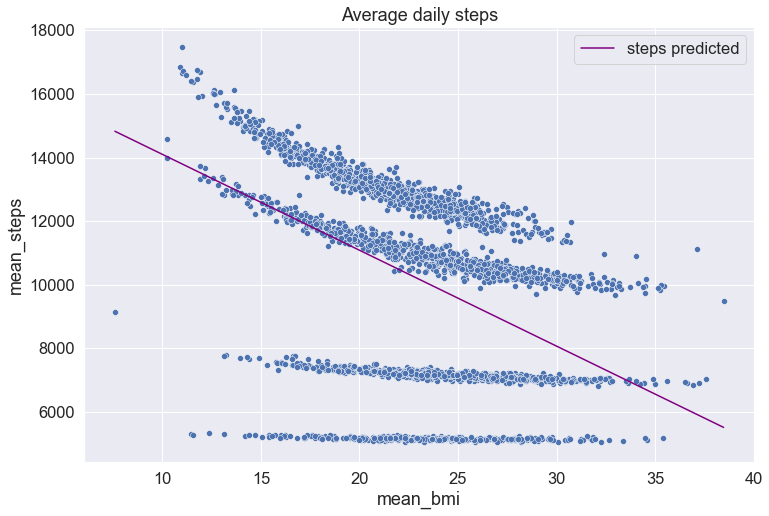

In [26]:
fig = plt.gcf()

# Change seaborn plot size
fig.set_size_inches(12, 8)
sns.set(font_scale=1.5)
sns.scatterplot(x = 'mean_bmi', y = 'mean_steps', data=pd_ht).set(title='Average daily steps')
sns.lineplot(data=pd_meanbmi_meansteps, x = 'mean_bmi', y = 'mean_steps_predicted',label='steps predicted',color='purple')

# Getting MSE and MAE from other models previously calculated

In [27]:
x_models = [['mean_active_heartrate', 'mean_resting_heartrate'],
            ['mean_active_heartrate', 'mean_vo2'],
            ['mean_active_heartrate', 'mean_bmi', 'mean_vo2'],
            ['mean_active_heartrate', 'mean_bmi', 'mean_vo2', 'mean_resting_heartrate']]

y_default = 'mean_steps'
for x_model in x_models:
    
    lr_model = LinearRegression().fit(pd_ht[x_model], pd_ht[y_default])
    array_predict = lr_model.predict(pd_ht[x_model])
    print('R^2 of model {0} ~ {1} is: {2:0.5f}'.format(y_default,' + '.join(x_model),lr_model.score(pd_ht[x_model], pd_ht[y_default])))
    print('MSE of the model {0} ~ {1} is: {2:0.5f}'.format(y_default,' + '.join(x_model),mean_squared_error(pd_ht[y_default], array_predict)))
    print('MAE of the model {0} ~ {1} is: {2:0.5f}'.format(y_default,' + '.join(x_model),mean_absolute_error(pd_ht[y_default], array_predict)))
    print('\n')

R^2 of model mean_steps ~ mean_active_heartrate + mean_resting_heartrate is: 0.71684
MSE of the model mean_steps ~ mean_active_heartrate + mean_resting_heartrate is: 2522409.80330
MAE of the model mean_steps ~ mean_active_heartrate + mean_resting_heartrate is: 1256.71685


R^2 of model mean_steps ~ mean_active_heartrate + mean_vo2 is: 0.68763
MSE of the model mean_steps ~ mean_active_heartrate + mean_vo2 is: 2782684.48577
MAE of the model mean_steps ~ mean_active_heartrate + mean_vo2 is: 1345.74714


R^2 of model mean_steps ~ mean_active_heartrate + mean_bmi + mean_vo2 is: 0.74241
MSE of the model mean_steps ~ mean_active_heartrate + mean_bmi + mean_vo2 is: 2294657.34811
MAE of the model mean_steps ~ mean_active_heartrate + mean_bmi + mean_vo2 is: 1241.53791


R^2 of model mean_steps ~ mean_active_heartrate + mean_bmi + mean_vo2 + mean_resting_heartrate is: 0.78319
MSE of the model mean_steps ~ mean_active_heartrate + mean_bmi + mean_vo2 + mean_resting_heartrate is: 1931413.28402
MAE o

## Perform the Train-Test Split

In [29]:
x_models = [['mean_active_heartrate', 'mean_resting_heartrate'],
            ['mean_active_heartrate', 'mean_vo2'],
            ['mean_active_heartrate', 'mean_bmi', 'mean_vo2'],
            ['mean_active_heartrate', 'mean_bmi', 'mean_vo2', 'mean_resting_heartrate']]

y_default = 'mean_steps'

for x_model in x_models:
    x_train, x_test, y_train, y_test = train_test_split(pd_ht[x_model], pd_ht[y_default])
    lr_model = LinearRegression().fit(x_train,y_train)
    y_train_predicted = lr_model.predict(x_train)
    y_test_predicted = lr_model.predict(x_test)
    print('Model \t\t {0} ~ \t {1} \n'.format(y_default,' + '.join(x_model)))
    #print('Training mse: {0}'.format(mean_squared_error(y_train, y_train_predicted)))
    print('Training rmse: {0}'.format(np.sqrt(mean_squared_error(y_train, y_train_predicted))))
    #print('Test mse: {0}'.format(mean_squared_error(y_test, y_test_predicted)))
    print('Training mae: {0}'.format(mean_absolute_error(y_train, y_train_predicted)))
    print('Test rmse: {0}'.format(np.sqrt(mean_squared_error(y_test, y_test_predicted))))
    print('Test mae: {0}'.format(mean_absolute_error(y_test, y_test_predicted)))
    print('\n')

Model 		 mean_steps ~ 	 mean_active_heartrate + mean_resting_heartrate 

Training rmse: 1597.1973244466394
Training mae: 1264.9310363613292
Test rmse: 1562.2937148476199
Test mae: 1245.5931185796376


Model 		 mean_steps ~ 	 mean_active_heartrate + mean_vo2 

Training rmse: 1663.8207302204016
Training mae: 1341.7634824313106
Test rmse: 1681.1843193143209
Test mae: 1357.301055474239


Model 		 mean_steps ~ 	 mean_active_heartrate + mean_bmi + mean_vo2 

Training rmse: 1499.5804727045163
Training mae: 1230.1820930043932
Test rmse: 1560.7306023623487
Test mae: 1272.682915886622


Model 		 mean_steps ~ 	 mean_active_heartrate + mean_bmi + mean_vo2 + mean_resting_heartrate 

Training rmse: 1383.7958055915333
Training mae: 1103.862223653891
Test rmse: 1409.021835554503
Test mae: 1105.4447890115227


